# Finance Data Project

##### This project focuses on exploratory data analysis of stock prices and sees how they progressed throughout the financial crisis all the way to early 2016.

### The Imports

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready($('div.input').hide());
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

### Getting the Data
##### The stock information from Jan 1st 2006 to Jan 1st 2016 for the Bank of America,CitiGroup,Goldman Sachs,JPMorgan Chaseand Morgan Stanley were gotten from Alpha Vantage  using API-Key.

In [6]:
import os
from datetime import datetime
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", "av-daily", start,end,api_key=os.environ.get('API-KEY'))

# CitiGroup
C = data.DataReader("C", "av-daily", start,end,api_key=os.environ.get('API-KEY'))

# Goldman Sachs
GS = data.DataReader("GS", "av-daily", start,end,api_key=os.environ.get('API-KEY'))

# JPMorgan Chase
JPM = data.DataReader("JPM", "av-daily", start,end,api_key=os.environ.get('API-KEY'))

# Morgan Stanley
MS = data.DataReader("MS", "av-daily", start,end,api_key=os.environ.get('API-KEY'))

###### Create a list of the ticker symbols

In [7]:
tickers = sorted(['BAC', 'C', 'GS', 'JPM', 'MS'])

###### concatenate the bank dataframes together

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS],axis=1,keys=tickers)

###### Set the column name levels

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

###### head of the dataframe

In [10]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...    JPM                                    MS  \
Stock Info     volume  ...   open   high    low  close    volume   open   
2006-01-03   15376000  ...  39.83  40.36  39.30  40.19  12838600  57.17   
2006-01-04   18709000  ...  39.78  40.14  39.42  39.62  13491500  58.70   
2006-01-05   11431000  ...  39.61  39.81  39.50  39.74   8109400  58.55   
2006-01-06   13702000  ...  39.92  40.24  39.55  40.02   7966900  58.77   
2006-01-09   16807000  ...  39.88  40.72  39.88  40.67  16575200  58.63   

Bank Ticker                                  
Stock Info    high      low  close   volume  
2006-01-03   58.49  56.7400  58.31  5377000  
2006-01-04   59.28  58.3500  58.35  7977800  
2006-01-05   58.59  58.0200  58.51  5778000  
2006-01-06   58.85  58.0500  58.57  6889800  
2006-01-09   59.29  58.6244  59.19  4144500  

[5 rows x 25 columns]

### EDA

###### Check the maximum close price for each bank's stock throughout the time period

In [11]:
bank_stocks.xs(key= 'close', level= 'Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
dtype: float64

###### Create a dataframe that contains the returns for each bank's stock.

In [12]:
returns = pd.DataFrame()
for x in tickers:
    returns[x +' Return'] = bank_stocks[x]['close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586


###### Pairplot of the returns dataframe

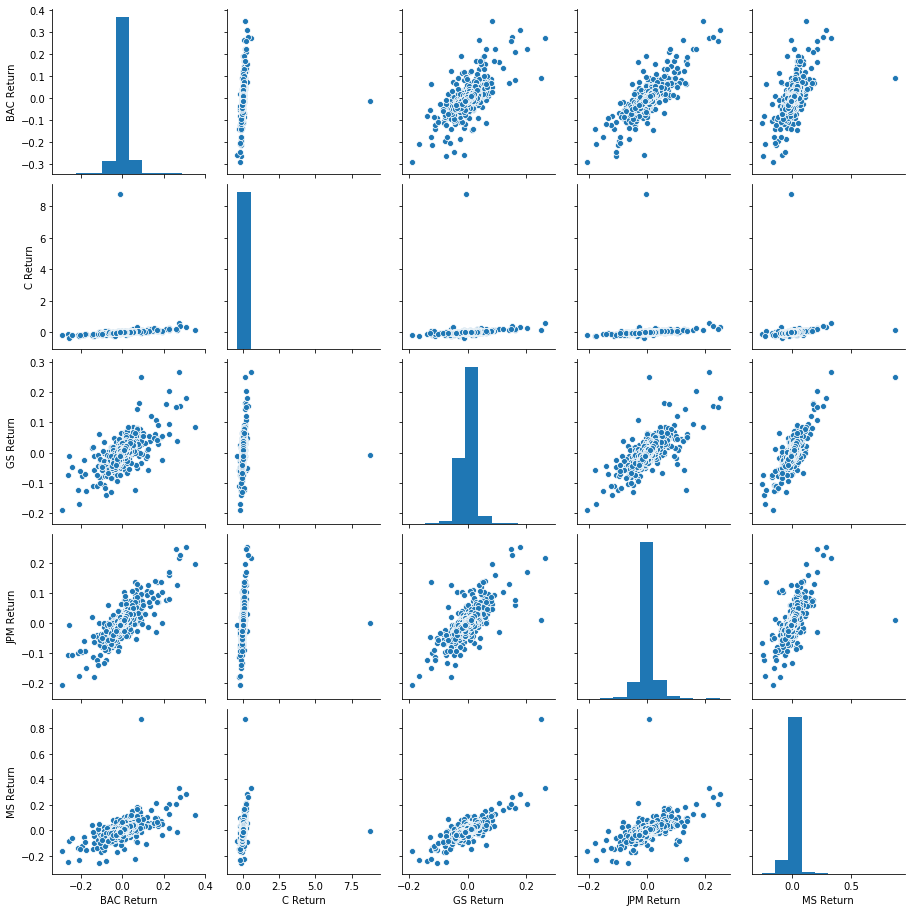

In [13]:
import seaborn as sns
sns.pairplot(returns)

#### CitiGroup Returns shown a wired staight line.By searching,it cames out that it had a huge stock crash in 2008 (Global Financial Crisis)

###### Dates each bank stock had the best single day returns

In [14]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
dtype: object

###### Dates each bank stock had the worst single day returns

In [15]:
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
dtype: object

##### Three banks share the same day for the worst drop.By searching the day(2009-1-20) it came out that it was the Obama's inauguration day!

###### Standard deviation of the returns over the entire time period

In [16]:
returns.std()

BAC Return    0.036617
C Return      0.179065
GS Return     0.025357
JPM Return    0.027651
MS Return     0.037831
dtype: float64

#### CititGroup is the riskiest stock over the entire time period

###### Standard deviation of the returns in 2015

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
dtype: float64

#### Morgan Stanley and Bank of America is the riskiest stock for the year 2015

###### Morgan Stanley 2015 returns

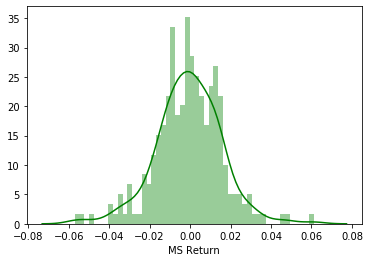

In [18]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

###### CitiGroup 2008 returns

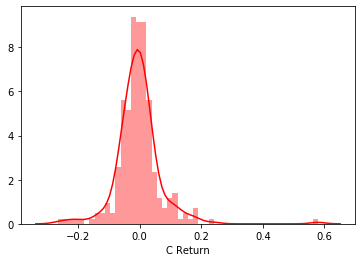

In [19]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

###### Close price for each bank for the entire time

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

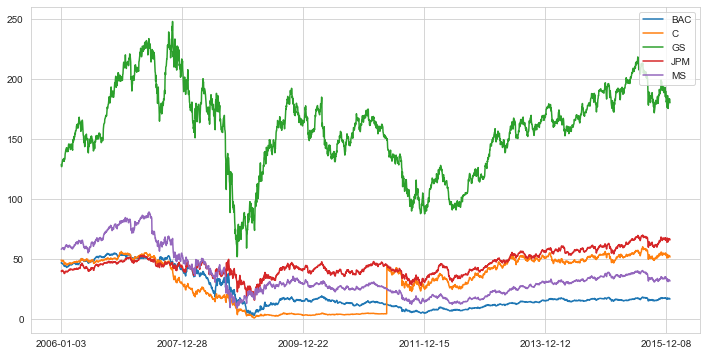

In [21]:
bank_stocks.xs(key= 'close', level= 'Stock Info', axis=1).plot(figsize=(12,6))
plt.legend(loc= 'upper right')

###### Close price for each bank for the entire time(Plotly for close investigation)

In [22]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

###### 30 day average against the Close Price for Bank Of America's stock for the year 2008

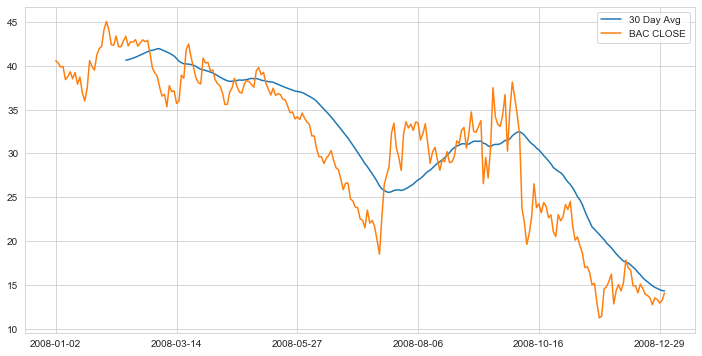

In [23]:
plt.figure(figsize=(12,6))
BAC['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

###### Heatmap of the correlation between the stocks Close Price

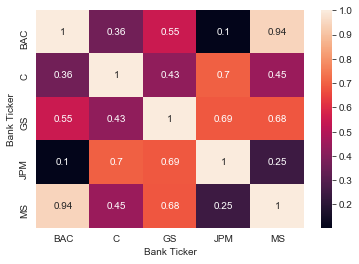

In [24]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

###### cluster the correlations

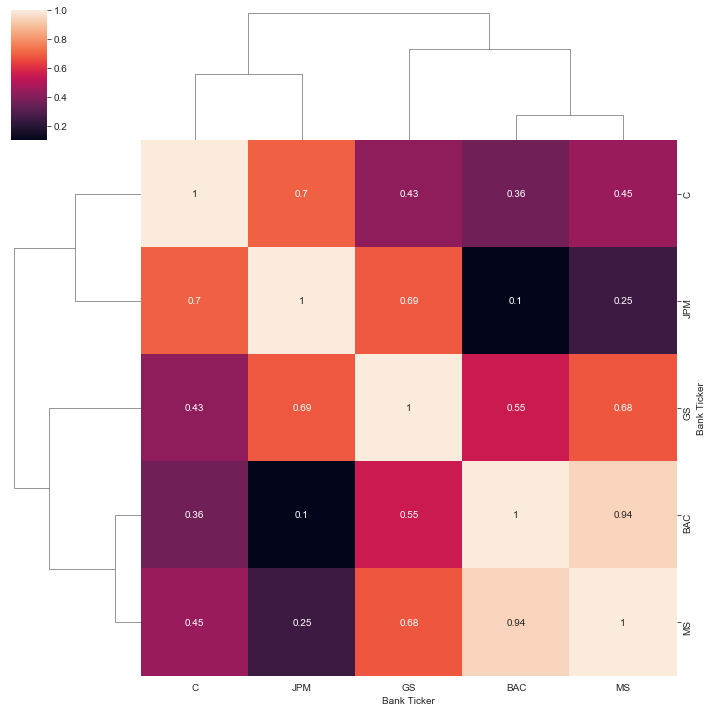

In [25]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

###### Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [26]:
BAC[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

###### Moving Averages of Morgan Stanley for the year 2015

In [27]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

###### Bollinger Band Plot for Bank of America for the year 2015

In [28]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')